## 利用朴素贝叶斯分类实现手写数字识别

In [1]:
from sklearn.datasets import load_digits    # 导入手写数据集
from sklearn.model_selection import train_test_split
from sklearn.manifold import Isomap    #数据降维
from sklearn.metrics import accuracy_score    #计算准确率
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB    #导入三种朴素贝叶斯分类器
from sklearn.metrics import confusion_matrix    #导入混淆矩阵
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 加载手写数据集

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
'''查看数据维度'''
digits.images.shape

(1797, 8, 8)

In [4]:
'''查看第一张图'''
print(digits.images[0].shape)
print(digits.images[0])

(8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


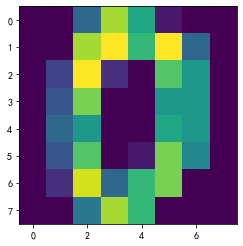

In [5]:
'''绘制第一张图'''
plt.imshow(digits.images[0])
plt.show()

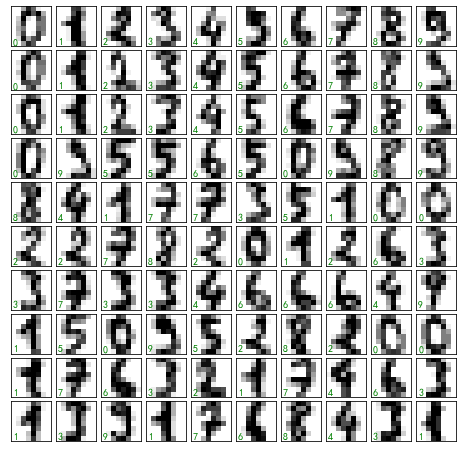

In [6]:
'''绘制手写数字图像'''
fig,axes = plt.subplots(10,10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
#     ax.imshow(digits.images[i])
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')
plt.show()

In [7]:
'''读取特征数据'''
X = digits.data
X.shape

(1797, 64)

In [8]:
'''读取标签值'''
Y = digits.target
Y.shape

(1797,)

## 对特征进行降维进行可视化

In [9]:
'''使用流形学习算法中的 Isomap算法对数据进行降维'''
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

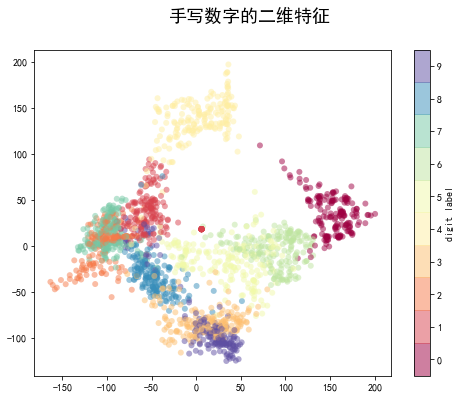

In [10]:
'''可视化降维后的数据'''
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle(u"手写数字的二维特征", fontsize= 18)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,edgecolor='none', 
            alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

## 拆分数据集

In [11]:
'''拆分训练集和测试集，测试集比例为0.2'''
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2)

In [12]:
'''构建分类器识别手写数字'''
def model(model):
    model.fit(Xtrain,Ytrain)
    y_model = model.predict(Xtest)
    model_acc = accuracy_score(Ytest,y_model)
    return y_model, model_acc
#     print(f'{str(model)[:-2]}识别手写数字的准确率为：{model_gaus_acc}')

In [13]:
'''使用混淆矩阵查看模型识别情况'''
def conf_matrix(model):
    plt.figure(figsize=(8, 6))
    mat = confusion_matrix(Ytest,model)
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()

高斯朴素贝叶斯分类器识别手写数字的准确率为：0.85


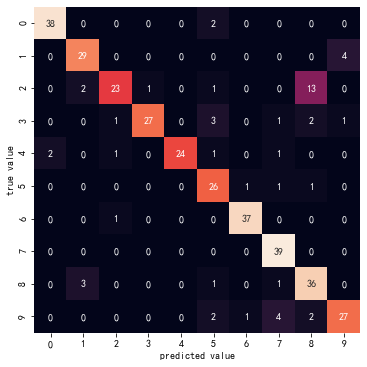

In [14]:
# 高斯朴素贝叶斯分类器
gaus_model, gaus_acc = model(GaussianNB())
print(f'高斯朴素贝叶斯分类器识别手写数字的准确率为：{gaus_acc}')
conf_matrix(gaus_model)

多项式朴素贝叶斯分类器识别手写数字的准确率为：0.9055555555555556


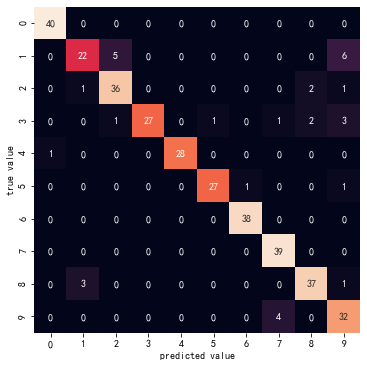

In [15]:
# 多项式朴素贝叶斯分类器
mult_model, mult_acc = model(MultinomialNB())
print(f'多项式朴素贝叶斯分类器识别手写数字的准确率为：{mult_acc}')
conf_matrix(mult_model)

伯努利朴素贝叶斯分类器识别手写数字的准确率为：0.8444444444444444


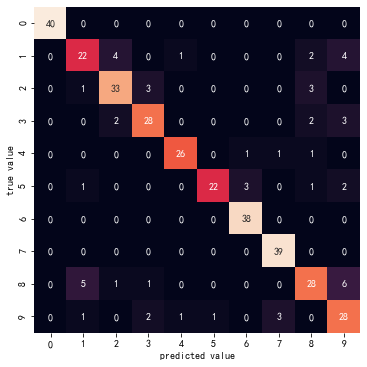

In [16]:
#伯努利朴素贝叶斯分类器
bern_model, bern_acc = model(BernoulliNB())
print(f'伯努利朴素贝叶斯分类器识别手写数字的准确率为：{bern_acc}')
conf_matrix(bern_model)

由三种贝叶斯分类器对手写数字识别的准确率的结果可知：多项式朴素贝叶斯的结果最好。